In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
from matplotlib import pyplot
import matplotlib.pyplot as mp
import warnings



%matplotlib inline





In [3]:
month_data = pd.read_csv('month_Data.csv')

In [4]:
month_data.head()

,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,trans_offer,...,offer_id_3,offer_id_4,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant
0,0.0,0.0,3.0,0.0,1.0,10.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,3
1,0.0,0.0,3.0,0.0,1.0,10.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,3
2,0.0,0.0,3.0,0.0,1.0,10.0,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,3
3,0.0,0.0,3.0,0.0,1.0,10.0,5.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,3
4,0.0,0.0,3.0,0.0,1.0,10.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,3


In [5]:
month_data['year'] = month_data['month_num'] //2
month_data['quarters'] = month_data['month_num']//4



In [6]:
def monthoffer(offerid, month_data, start_month=2,\
                                end_month=19):
    """
    DESCRIPTION:
        Creating subset of monthly data for the offer
    
    INPUTS:
        offerid - Offer id we want to analyze
        month_data - The monthly data set that we loaded above
        start_month - First month of the data
        end_month - Last month of the data
    
    OUTPUTS:
        month_data_new - subset of original dataset for offer id we want to analyze
    """

    for month_num in range(start_month,end_month+1):
        # get the current month's data
        month_data_sub = month_data[month_data['month_num']==month_num]
        month_data_sub= month_data_sub[(month_data_sub[offerid]==1) |\
                                    (month_data_sub['offer_id_10']==1)]
        # get individuals who received the offer during the month
        month_ind = month_data_sub[month_data_sub[offerid]==1].person_id.unique()
        if month_num == start_month:
            month_data_new=month_data_sub[month_data_sub['person_id'].isin(month_ind)]
        else:
            month_data_new_2 = month_data_sub[month_data_sub['person_id'].isin(month_ind)]
            month_data_new = pd.concat([month_data_new, month_data_new_2], axis=0)
    month_data_new.reset_index(inplace=True)
    return month_data_new

### Offer 0

In [7]:
month_data_0 = monthoffer('offer_id_0', month_data)

In [8]:
month_data_0.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29353,0.0,0.0,5.0,0.0,1.0,0.0,13.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
1,29354,0.0,0.0,5.0,0.0,1.0,10.0,13.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29362,0.0,0.0,5.0,0.0,1.0,0.0,18.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
3,29363,0.0,0.0,5.0,0.0,1.0,10.0,18.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29368,0.0,0.0,5.0,0.0,1.0,0.0,21.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0


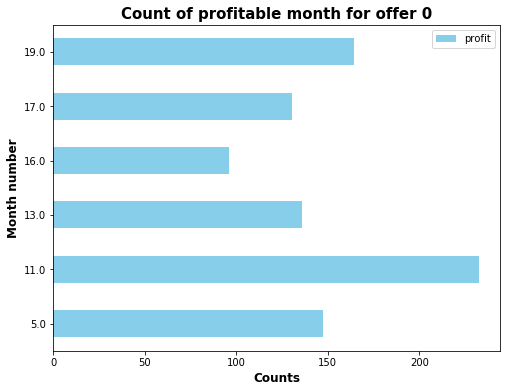

In [9]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_0[month_data_0['offer_id_0']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 0", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

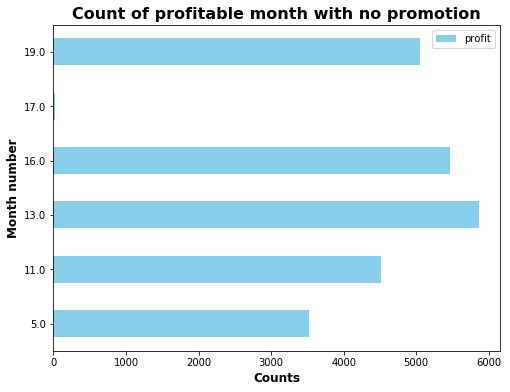

In [10]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_0[month_data_0['offer_id_0']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);


In [11]:
month_data_0.month_num.value_counts().sort_index()

5.0     2490
11.0    2644
13.0    2538
16.0    2500
17.0      18
19.0    2554
Name: month_num, dtype: int64

In [12]:


train_offer_0 = month_data_0[month_data_0['month_num']<=16].reset_index(drop=True)
valid_offer_0 = month_data_0[month_data_0['month_num']==17].reset_index(drop=True)
test_offer_0 = month_data_0[month_data_0['month_num']==19].reset_index(drop=True)

### Offer 1

In [13]:
month_data_1 = monthoffer('offer_id_1', month_data)

In [14]:
month_data_1.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29333,0.0,0.0,5.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
1,29334,0.0,0.0,5.0,0.0,1.0,10.0,2.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29337,0.0,0.0,5.0,0.0,1.0,1.0,4.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
3,29338,0.0,0.0,5.0,0.0,1.0,10.0,4.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29372,0.0,0.0,5.0,0.0,1.0,1.0,23.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0


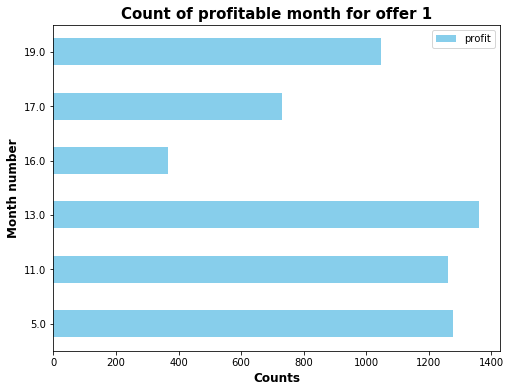

In [15]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_1[month_data_1['offer_id_1']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 1", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

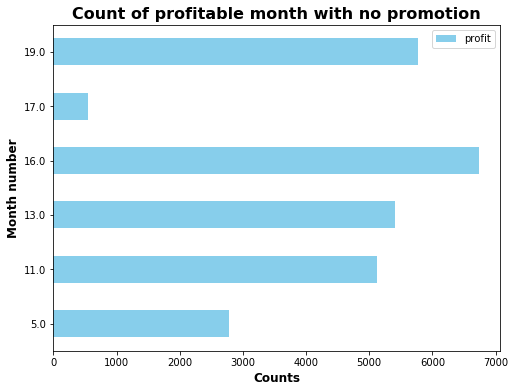

In [16]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_1[month_data_1['offer_id_1']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);


### Offer 2

In [17]:
month_data_2 = monthoffer('offer_id_2', month_data)

In [18]:
month_data_2.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29360,0.0,0.0,5.0,0.0,1.0,2.0,17.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
1,29361,0.0,0.0,5.0,0.0,1.0,10.0,17.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29374,0.0,0.0,5.0,0.0,1.0,2.0,24.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
3,29375,0.0,0.0,5.0,0.0,1.0,10.0,24.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29408,0.0,0.0,5.0,0.0,1.0,2.0,43.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0


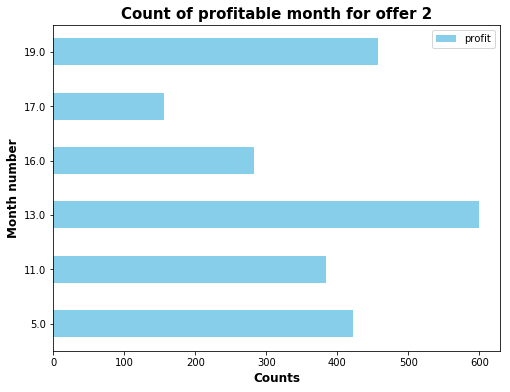

In [19]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_2[month_data_2['offer_id_2']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 2", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

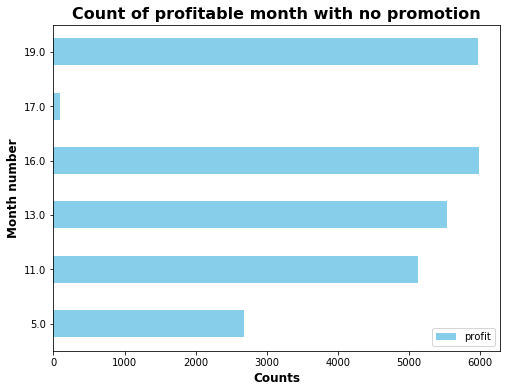

In [20]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_2[month_data_2['offer_id_2']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer 3


In [21]:
month_data_3 = monthoffer('offer_id_3', month_data)

In [22]:
month_data_3.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29343,0.0,0.0,5.0,0.0,1.0,3.0,7.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
1,29344,0.0,0.0,5.0,0.0,1.0,10.0,7.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29355,0.0,0.0,5.0,0.0,1.0,3.0,14.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
3,29356,0.0,0.0,5.0,0.0,1.0,10.0,14.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29370,0.0,0.0,5.0,0.0,1.0,3.0,22.0,0.0,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0


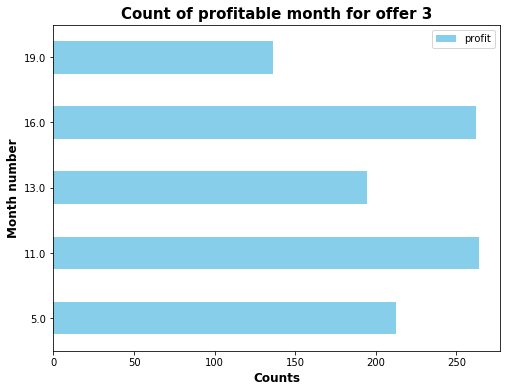

In [23]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_3[month_data_3['offer_id_3']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 3", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

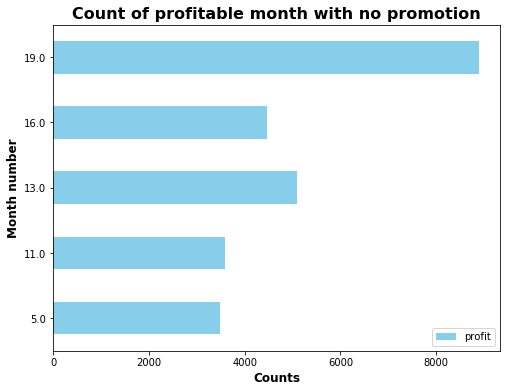

In [24]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_3[month_data_3['offer_id_3']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer 4

In [25]:
month_data_4 = monthoffer('offer_id_4', month_data)

In [26]:
month_data_4.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29366,0.00,0.0,5.0,0.00,1.0,4.0,20.0,0.00,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
1,29367,1.13,0.0,5.0,1.13,1.0,10.0,20.0,1.13,1.0,...,0,0,0,0,0,1,0,1,2.0,1.0
2,29392,0.00,0.0,5.0,0.00,1.0,4.0,35.0,0.00,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0
3,29393,0.00,0.0,5.0,0.00,1.0,10.0,35.0,0.00,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29394,0.00,0.0,5.0,0.00,1.0,4.0,36.0,0.00,0.0,...,0,0,0,0,0,0,0,2,2.0,1.0


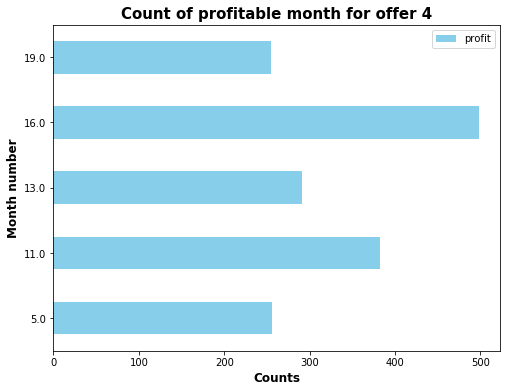

In [27]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_4[month_data_4['offer_id_4']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 4", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

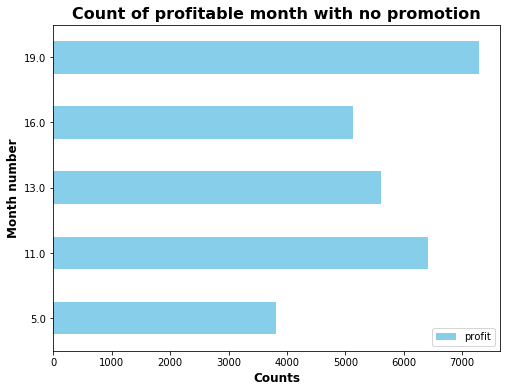

In [28]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_4[month_data_4['offer_id_4']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer 5

In [29]:
month_data_5 = monthoffer('offer_id_5', month_data)

In [30]:
month_data_5.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29329,0.0,0.0,5.0,0.0,1.0,5.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,2,2.0,1.0
1,29330,0.0,0.0,5.0,0.0,1.0,10.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29400,0.0,0.0,5.0,0.0,1.0,5.0,39.0,0.0,0.0,...,1,0,0,0,0,0,0,2,2.0,1.0
3,29401,0.0,0.0,5.0,0.0,1.0,10.0,39.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29410,0.0,0.0,5.0,0.0,1.0,5.0,44.0,0.0,0.0,...,1,0,0,0,0,0,0,2,2.0,1.0


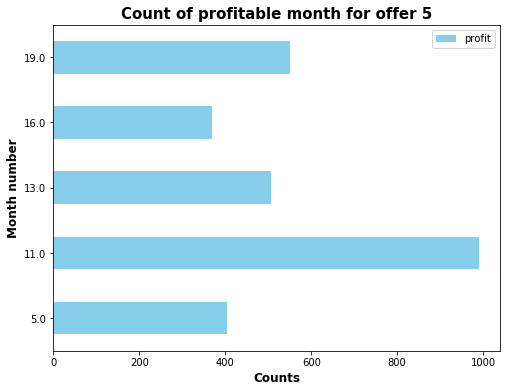

In [31]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_5[month_data_5['offer_id_5']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 5", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

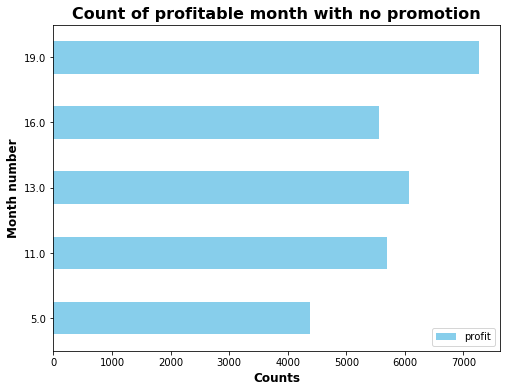

In [32]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_5[month_data_5['offer_id_5']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer6

In [33]:
month_data_6 = monthoffer('offer_id_6', month_data)

In [34]:
month_data_6.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29383,0.00,0.0,5.0,0.00,1.0,6.0,29.0,0.00,0.0,...,0,1,0,0,0,0,0,2,2.0,1.0
1,29384,0.00,0.0,5.0,0.00,1.0,10.0,29.0,0.00,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29421,0.00,0.0,5.0,0.00,1.0,6.0,51.0,0.00,0.0,...,0,1,0,0,0,0,0,2,2.0,1.0
3,29422,18.53,0.0,5.0,18.53,1.0,10.0,51.0,18.53,1.0,...,0,0,0,0,0,1,0,1,2.0,1.0
4,29444,0.00,0.0,5.0,0.00,1.0,6.0,64.0,0.00,0.0,...,0,1,0,0,0,0,0,2,2.0,1.0


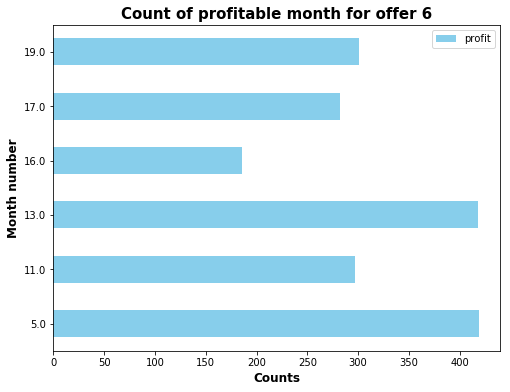

In [35]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_6[month_data_6['offer_id_6']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 6", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

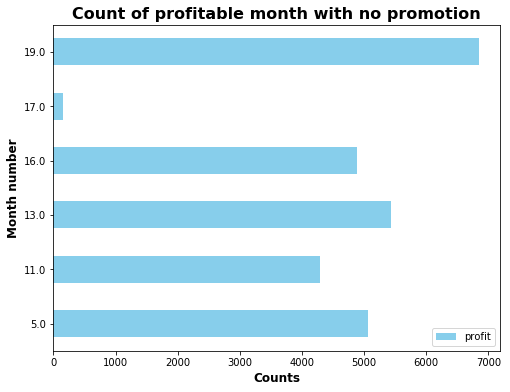

In [36]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_6[month_data_6['offer_id_6']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer 7

In [37]:
month_data_7 = monthoffer('offer_id_7', month_data)

In [38]:
month_data_7.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29335,0.0,0.0,5.0,0.0,1.0,7.0,3.0,0.0,0.0,...,0,0,1,0,0,0,0,2,2.0,1.0
1,29336,0.0,0.0,5.0,0.0,1.0,10.0,3.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29347,0.0,0.0,5.0,0.0,1.0,7.0,9.0,0.0,0.0,...,0,0,1,0,0,0,0,2,2.0,1.0
3,29348,0.0,0.0,5.0,0.0,1.0,10.0,9.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29350,0.0,0.0,5.0,0.0,1.0,7.0,11.0,0.0,0.0,...,0,0,1,0,0,0,0,2,2.0,1.0


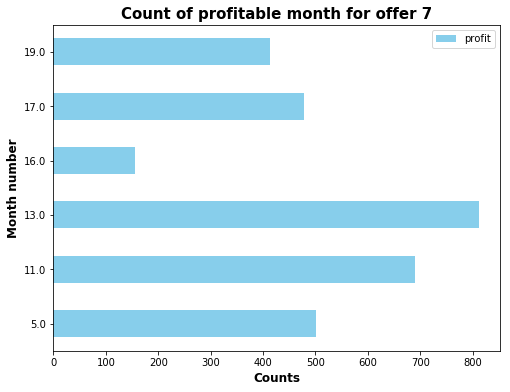

In [39]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_7[month_data_7['offer_id_7']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 7", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

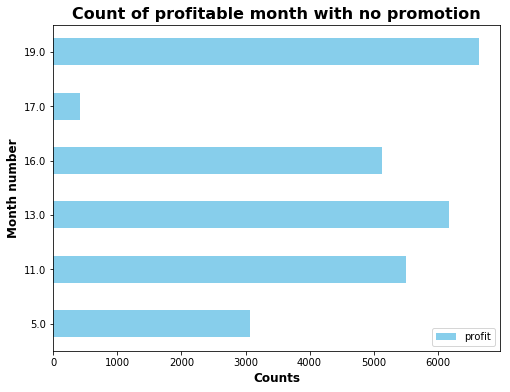

In [40]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_7[month_data_7['offer_id_7']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer 8

In [41]:
month_data_8 = monthoffer('offer_id_8', month_data)

In [42]:
month_data_8.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29331,0.00,0.0,5.0,0.00,1.0,8.0,1.0,0.00,0.0,...,0,0,0,1,0,0,0,2,2.0,1.0
1,29332,0.00,0.0,5.0,0.00,1.0,10.0,1.0,0.00,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29364,0.00,0.0,5.0,0.00,1.0,8.0,19.0,0.00,0.0,...,0,0,0,1,0,0,0,2,2.0,1.0
3,29365,0.74,0.0,5.0,0.74,1.0,10.0,19.0,0.74,1.0,...,0,0,0,0,0,1,0,1,2.0,1.0
4,29402,0.00,0.0,5.0,0.00,1.0,8.0,40.0,0.00,0.0,...,0,0,0,1,0,0,0,2,2.0,1.0


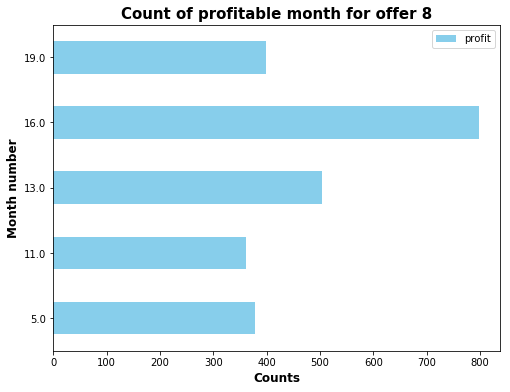

In [43]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_8[month_data_8['offer_id_8']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 8", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

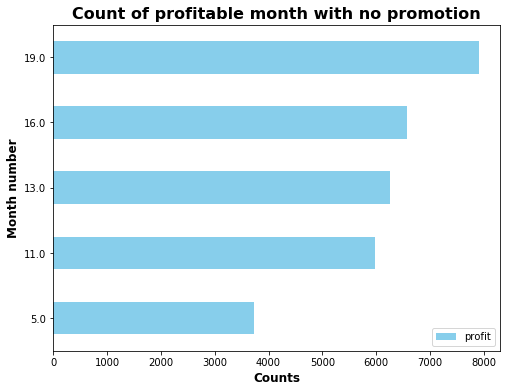

In [44]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_8[month_data_8['offer_id_8']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

### Offer 9

In [45]:
month_data_9 = monthoffer('offer_id_9', month_data)

In [46]:
month_data_9.head()

,index,amt_per_trans,cost,month_num,monthly_spent,num_offers,offer_id,person_id,profit,profity,...,offer_id_5,offer_id_6,offer_id_7,offer_id_8,offer_id_9,offer_id_10,target,quadrant,year,quarters
0,29339,0.0,0.0,5.0,0.0,1.0,9.0,5.0,0.0,0.0,...,0,0,0,0,1,0,0,2,2.0,1.0
1,29340,0.0,0.0,5.0,0.0,1.0,10.0,5.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
2,29341,0.0,0.0,5.0,0.0,1.0,9.0,6.0,0.0,0.0,...,0,0,0,0,1,0,0,2,2.0,1.0
3,29342,0.0,0.0,5.0,0.0,1.0,10.0,6.0,0.0,0.0,...,0,0,0,0,0,1,0,3,2.0,1.0
4,29345,0.0,0.0,5.0,0.0,1.0,9.0,8.0,0.0,0.0,...,0,0,0,0,1,0,0,2,2.0,1.0


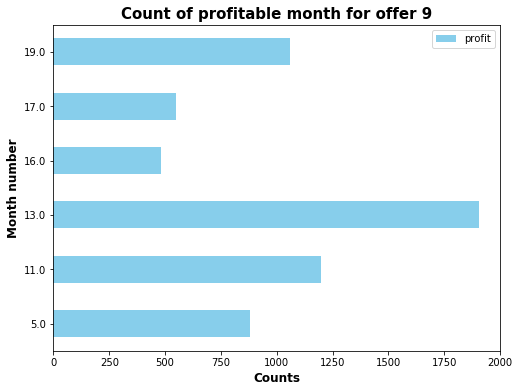

In [47]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_9[month_data_9['offer_id_9']==1].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh',  color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month for offer 9", fontsize=15, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);

##https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

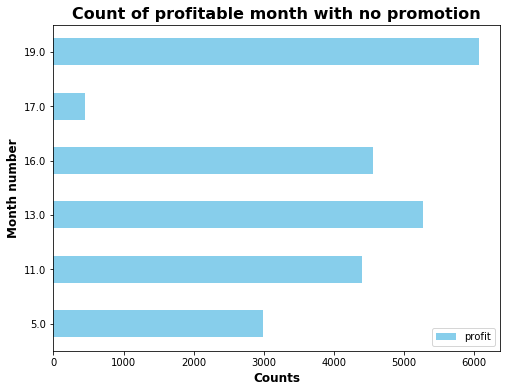

In [48]:
fig, ax = mp.subplots(figsize=(8,6));
month_data_9[month_data_9['offer_id_9']==0].groupby('month_num').agg({'profit':'sum'}).reset_index().plot(x='month_num', y='profit', kind='barh', color = 'skyblue',ax=ax);
ax.set_title("Count of profitable month with no promotion", fontsize=16, weight = 'bold')
ax.set_xlabel("Counts", fontsize=12 , weight = 'bold') ;
ax.set_ylabel("Month number", fontsize=12 , weight = 'bold');
ax.tick_params(axis='both', which='major', labelsize=10);